# ReadMeのコマンドの実践

## 1. Cacheの作成
- py_func=cache　で指定
```bash
 python run_training.py \
    py_func=cache +training=train_pluto \
    scenario_builder=nuplan_mini \
    cache.cache_path=/nuplan/exp/sanity_check \
    cache.cleanup_cache=true \
    scenario_filter=training_scenarios_tiny \
    worker=sequential
```

### scenario_builder=nuplan_mini
- ファイルパス: 
    - /workspace/nuplan-devkit/nuplan/planning/script/config/common/scenario_builder/nuplan_mini.yaml

- .db があるフォルダを指定する
    - 各 *.db が、マップ情報などを持っている 

- data_root で指定したフォルダの直下に、 *.db があることを前提としている

- scenario_builder/*.yaml　の違い
    - nuplan_mini.yaml
        - data_root = ${oc.env:NUPLAN_DATA_ROOT}/nuplan-v1.1/splits/mini
    - nuplan
        - data_root = ${oc.env:NUPLAN_DATA_ROOT}/nuplan-v1.1/trainval
        - 補足
            - trainvalの下に全データがあることを想定しているが、downloadデータはそうなっていない
    - nuplan_boston(自作)
        - data_root = ${oc.env:NUPLAN_DATA_ROOT}/nuplan-v1.1/splits/train_boston


- ファイルの内容
    ```yaml
    _target_: nuplan.planning.scenario_builder.nuplan_db.nuplan_scenario_builder.NuPlanScenarioBuilder  # 使用するシナリオビルダー実装のクラスパス
    _convert_: 'all'  # Hydraで全フィールドをPythonオブジェクトへ自動変換

    # mini split のデータルート（環境変数 NUPLAN_DATA_ROOT が前提）
    data_root: ${oc.env:NUPLAN_DATA_ROOT}/nuplan-v1.1/splits/mini

    # マップデータのルート（NUPLAN_MAPS_ROOT を参照）
    map_root: ${oc.env:NUPLAN_MAPS_ROOT}

    # センサーブロブのルート（同じく NUPLAN_DATA_ROOT 配下）
    sensor_root: ${oc.env:NUPLAN_DATA_ROOT}/nuplan-v1.1/sensor_blobs

    db_files: null  # ローカルにDBファイルパスを指定する場合はここにリストを置く。nullなら data_root を使用

    map_version: nuplan-maps-v1.0  # 使用するマップのバージョン

    include_cameras: false  # シナリオにカメラデータを含めるか

    max_workers: null  # 並列ワーカー数（null で自動）
    
    verbose: ${verbose}  # 上位の verbose 設定を継承

    defaults:
    - vehicle_parameters: nuplan_vehicle_parameters  # 車両パラメータ設定
    - scenario_mapping: nuplan_scenario_mapping      # シナリオマッピング設定
    ```

In [26]:
# Docker file内で定義している
!echo "NUPLAN_DATA_ROOT = $NUPLAN_DATA_ROOT"
!echo "NUPLAN_MAPS_ROOT = $NUPLAN_MAPS_ROOT"

NUPLAN_DATA_ROOT = /nuplan/dataset
NUPLAN_MAPS_ROOT = /nuplan/dataset/maps


In [27]:
# miniのファイルリスト
!ls -lh /nuplan/dataset/nuplan-v1.1/splits/mini

total 14G
-rw-rw-r-- 1 1000 1000 321M Sep 23  2022 2021.05.12.22.00.38_veh-35_01008_01518.db
-rw-rw-r-- 1 1000 1000 329M Sep 23  2022 2021.05.12.22.28.35_veh-35_00620_01164.db
-rw-rw-r-- 1 1000 1000 231M Sep 23  2022 2021.05.12.23.36.44_veh-35_00152_00504.db
-rw-rw-r-- 1 1000 1000 187M Sep 23  2022 2021.05.12.23.36.44_veh-35_01133_01535.db
-rw-rw-r-- 1 1000 1000 246M Sep 23  2022 2021.05.12.23.36.44_veh-35_02035_02387.db
-rw-rw-r-- 1 1000 1000 330M Sep 23  2022 2021.05.25.14.16.10_veh-35_01690_02183.db
-rw-rw-r-- 1 1000 1000 166M Sep 23  2022 2021.06.03.12.02.06_veh-35_00233_00609.db
-rw-rw-r-- 1 1000 1000 242M Sep 23  2022 2021.06.03.13.55.17_veh-35_00073_00426.db
-rw-rw-r-- 1 1000 1000 276M Sep 23  2022 2021.06.07.12.54.00_veh-35_01843_02314.db
-rw-rw-r-- 1 1000 1000 271M Sep 23  2022 2021.06.07.18.53.26_veh-26_00005_00427.db
-rw-rw-r-- 1 1000 1000 317M Sep 23  2022 2021.06.08.12.54.54_veh-26_04262_04732.db
-rw-rw-r-- 1 1000 1000 180M Sep 23  2022 2021.06.08.14.35.24_veh-26_02555_030

In [28]:
# mapの種類
!ls -lh /nuplan/dataset/maps

total 72K
drwxr-xr-x 2 root root 4.0K Jan 18 02:28 nuplan-maps-v1.0
-rw-rw-r-- 1 1000 1000  50K May  5  2022 nuplan-maps-v1.0.json
drwxrwxr-x 3 1000 1000 4.0K Oct  5  2022 sg-one-north
drwxrwxr-x 3 1000 1000 4.0K Oct  5  2022 us-ma-boston
drwxrwxr-x 3 1000 1000 4.0K Oct  5  2022 us-nv-las-vegas-strip
drwxrwxr-x 3 1000 1000 4.0K Oct  5  2022 us-pa-pittsburgh-hazelwood


In [29]:
# Mapファイルの表示
!ls -lh /nuplan/dataset/maps/us-nv-las-vegas-strip/9.15.1915/

total 638M
-rw-rw-r-- 1 1000 1000 135M May  5  2022 Intensity.npy.npz
-rw-rw-r-- 1 1000 1000 2.9M May  5  2022 drivable_area.npy.npz
-rw-rw-r-- 1 1000 1000 500M May  5  2022 map.gpkg


In [30]:
import glob, sqlite3


db_dir = "/nuplan/dataset/nuplan-v1.1/splits/mini/"
db_path = os.path.join(db_dir, "2021.05.12.22.00.38_veh-35_01008_01518.db")

print(f"DB: {db_path}")

with sqlite3.connect(db_path) as con:
    # 1) テーブル名一覧
    tables = [r[0] for r in con.execute("SELECT name FROM sqlite_master WHERE type='table';")]
    print("tables:", tables)

    # 2) “map” を含むカラムを探す
    map_cols = []
    for t in tables:
        cols = [r[1] for r in con.execute(f"PRAGMA table_info('{t}');")]
        for c in cols:
            if "map" in c.lower():
                map_cols.append((t, c))
    print("map columns:", map_cols)

    # 3) 見つかったカラムで distinct を取得
    for t, c in map_cols:
        vals = con.execute(f"SELECT DISTINCT {c} FROM '{t}' LIMIT 20;").fetchall()
        print(f"{t}.{c} -> {[v[0] for v in vals]}")

DB: /nuplan/dataset/nuplan-v1.1/splits/mini/2021.05.12.22.00.38_veh-35_01008_01518.db
tables: ['category', 'log', 'camera', 'lidar', 'ego_pose', 'track', 'image', 'scene', 'lidar_pc', 'lidar_box', 'scenario_tag', 'traffic_light_status']
map columns: [('log', 'map_version')]
log.map_version -> ['us-nv-las-vegas-strip']


#### .db が　Map情報を持っている
上記の結果より
- map_version = us-nv-las-vegas-strip

#### Mapを可視化する

Layers: ['baseline_paths', 'carpark_areas', 'generic_drivable_areas', 'dubins_nodes', 'lane_connectors', 'intersections', 'boundaries', 'crosswalks', 'lanes_polygons', 'lane_group_connectors', 'lane_groups_polygons', 'road_segments', 'stop_polygons', 'traffic_lights', 'walkways', 'gen_lane_connectors_scaled_width_polygons', 'meta']
描画完了: baseline_paths
描画完了: carpark_areas
描画完了: generic_drivable_areas
描画完了: dubins_nodes
描画完了: lane_connectors
描画完了: intersections
描画完了: boundaries
描画完了: crosswalks
描画完了: lanes_polygons
描画完了: lane_group_connectors
描画完了: lane_groups_polygons
描画完了: road_segments
描画完了: stop_polygons
描画完了: traffic_lights
描画完了: walkways
描画完了: gen_lane_connectors_scaled_width_polygons
スキップ: meta - no numeric data to plot


/tmp/ipykernel_115114/4017331524.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right", fontsize=8)


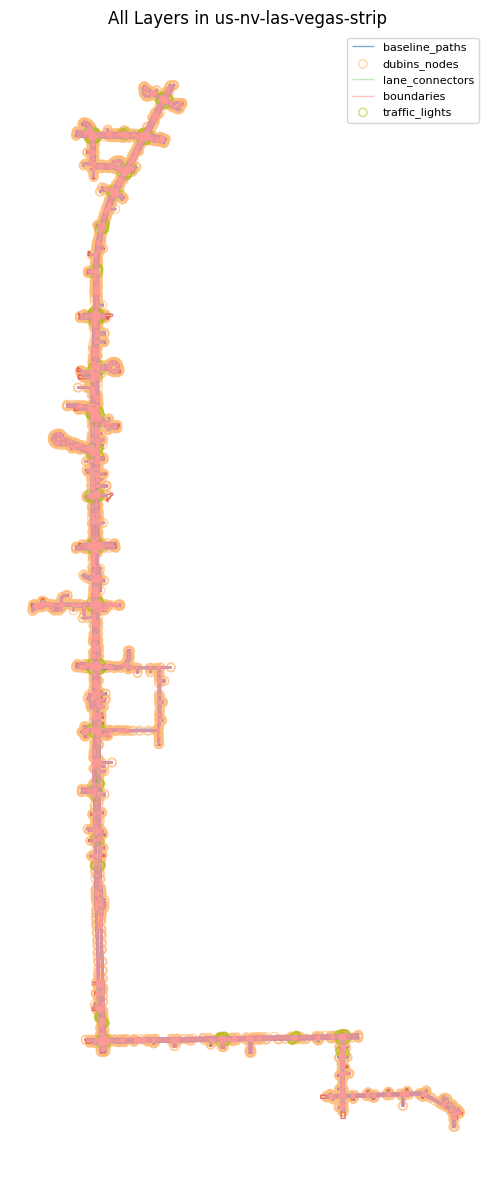

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

gpkg = "/nuplan/dataset/maps/us-nv-las-vegas-strip/9.15.1915/map.gpkg"

# レイヤ一覧取得
layers_obj = gpd.list_layers(gpkg)
layer_names = (
    layers_obj["name"].tolist() if hasattr(layers_obj, "columns") and "name" in layers_obj.columns
    else list(layers_obj)
)
print("Layers:", layer_names)

# カラーマップで各レイヤーに異なる色を割り当て
colors = cm.tab20(np.linspace(0, 1, len(layer_names)))

fig, ax = plt.subplots(figsize=(12, 12))
for i, layer_name in enumerate(layer_names):
    try:
        gdf = gpd.read_file(gpkg, layer=layer_name)
        gdf.plot(ax=ax, alpha=0.6, linewidth=0.8, edgecolor=colors[i], facecolor="none", label=layer_name)
        # gdf.plot(ax=ax, alpha=0.6, linewidth=1.0, linestyle='-', edgecolor=colors[i], facecolor="none", label=layer_name)
        print(f"描画完了: {layer_name}")
    except Exception as e:
        print(f"スキップ: {layer_name} - {e}")

ax.set_title("All Layers in us-nv-las-vegas-strip")
ax.legend(loc="upper right", fontsize=8)
ax.set_axis_off()
plt.tight_layout()
plt.show()

#### .db解説 : テーブル構造

In [42]:
import sqlite3
import pandas as pd

db_path = "/nuplan/dataset/nuplan-v1.1/splits/mini/2021.05.12.22.00.38_veh-35_01008_01518.db"

with sqlite3.connect(db_path) as con:
    tables = [r[0] for r in con.execute("SELECT name FROM sqlite_master WHERE type='table';")]
    
    print("各テーブルのカラム一覧:\n")
    for table in tables:
        schema = con.execute(f"PRAGMA table_info('{table}');").fetchall()
        cols = [s[1] for s in schema]
        print(f"{table:20s} : {cols}")

各テーブルのカラム一覧:

category             : ['token', 'name', 'description']
log                  : ['token', 'vehicle_name', 'date', 'timestamp', 'logfile', 'location', 'map_version']
camera               : ['token', 'log_token', 'channel', 'model', 'translation', 'rotation', 'intrinsic', 'distortion', 'width', 'height']
lidar                : ['token', 'log_token', 'channel', 'model', 'translation', 'rotation']
ego_pose             : ['token', 'timestamp', 'x', 'y', 'z', 'qw', 'qx', 'qy', 'qz', 'vx', 'vy', 'vz', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_rate_x', 'angular_rate_y', 'angular_rate_z', 'epsg', 'log_token']
track                : ['token', 'category_token', 'width', 'length', 'height']
image                : ['token', 'next_token', 'prev_token', 'ego_pose_token', 'camera_token', 'filename_jpg', 'timestamp']
scene                : ['token', 'log_token', 'name', 'goal_ego_pose_token', 'roadblock_ids']
lidar_pc             : ['token', 'next_token', 'prev_token',

In [38]:
import sqlite3
import pandas as pd

db_path = "/nuplan/dataset/nuplan-v1.1/splits/mini/2021.05.12.22.00.38_veh-35_01008_01518.db"

with sqlite3.connect(db_path) as con:
    tables = [r[0] for r in con.execute("SELECT name FROM sqlite_master WHERE type='table';")]
    
    for table in tables:
        print(f"\n{'='*60}")
        print(f"テーブル: {table}")
        print(f"{'='*60}")
        
        # スキーマ取得
        schema = con.execute(f"PRAGMA table_info('{table}');").fetchall()
        schema_df = pd.DataFrame(schema, columns=['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk'])
        print(schema_df[['name', 'type', 'pk']].to_string(index=False))
        
        # レコード数
        count = con.execute(f"SELECT COUNT(*) FROM {table};").fetchone()[0]
        print(f"\nレコード数: {count}")
        
        # サンプルデータ（最初の3件）
        if count > 0:
            sample = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 3;", con)
            print(f"\nサンプル:")
            print(sample.to_string(index=False))


テーブル: category
       name        type  pk
      token        BLOB   1
       name VARCHAR(64)   0
description        TEXT   0

レコード数: 7

サンプル:
                     token       name                                                      description
b'\xfdi\x05\x9bb\xa3F\x9f'    vehicle Includes all four or more wheeled vehicles, as well as trailers.
b'\xfc\x95\xc8{\x80oH\xf8'    bicycle                    Includes bicycles, motorcycles and tricycles.
b'l\xad\x90n\xb0\xb9K\xb5' pedestrian       All types of pedestrians, incl. strollers and wheelchairs.

テーブル: log
        name        type  pk
       token        BLOB   1
vehicle_name VARCHAR(64)   0
        date VARCHAR(64)   0
   timestamp     INTEGER   0
     logfile VARCHAR(64)   0
    location VARCHAR(64)   0
 map_version VARCHAR(64)   0

レコード数: 1

サンプル:
                     token vehicle_name       date        timestamp                                logfile  location           map_version
b'\xd9\x08\xa0i\xf1\x13S`'       veh-35 2021

#### .db解説 : ego_poseの軌跡

ego_pose レコード数: 51152
カラム: ['token', 'timestamp', 'x', 'y', 'z', 'qw', 'qx', 'qy', 'qz', 'vx', 'vy', 'vz', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_rate_x', 'angular_rate_y', 'angular_rate_z', 'epsg', 'log_token']
                        token         timestamp              x             y  \
0     b'@\xf2\x7f\xb3\xb5(QJ'  1620857888643194  664656.444395  3.999269e+06   
1        b'\xc9B\x07\xefmAV:'  1620857888653087  664656.420724  3.999269e+06   
2     b'D3S\xda\x9e\x9cP\x83'  1620857888662942  664656.395916  3.999269e+06   
3     b'\xf3d\x84\xc8x&]\xc8'  1620857888672725  664656.371278  3.999269e+06   
4  b'N\xc8U\xa3\xc2\x8cV\x06'  1620857888683571  664656.345249  3.999269e+06   

            z        qw        qx        qy        qz        vx        vy  \
0  606.396984  0.526221  0.005952 -0.012859 -0.850230  5.762095 -0.093231   
1  606.397835  0.526214  0.005915 -0.012870 -0.850234  5.750474 -0.091935   
2  606.398096  0.526184  0.005959 -0.012914 -0.85025

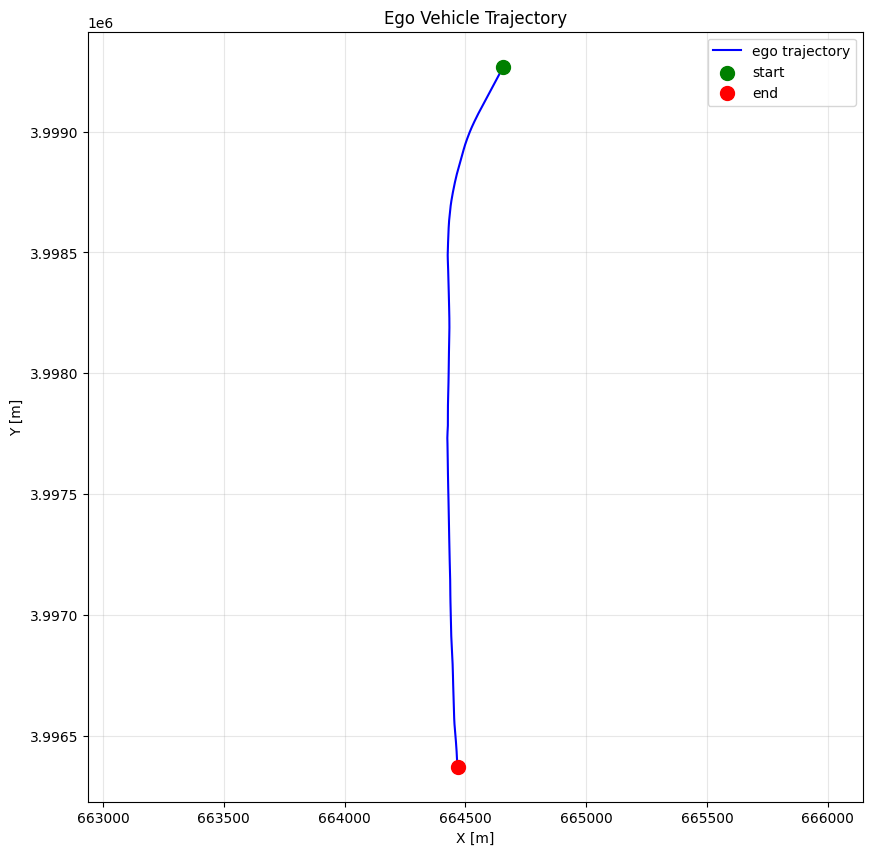

In [39]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = "/nuplan/dataset/nuplan-v1.1/splits/mini/2021.05.12.22.00.38_veh-35_01008_01518.db"

with sqlite3.connect(db_path) as con:
    # ego_pose を時系列で取得
    ego_df = pd.read_sql_query("SELECT * FROM ego_pose ORDER BY timestamp;", con)
    
print(f"ego_pose レコード数: {len(ego_df)}")
print(f"カラム: {ego_df.columns.tolist()}")
print(ego_df.head())

# 軌跡プロット（x, y があれば）
if 'x' in ego_df.columns and 'y' in ego_df.columns:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(ego_df['x'], ego_df['y'], linewidth=1.5, color='blue', label='ego trajectory')
    ax.scatter(ego_df['x'].iloc[0], ego_df['y'].iloc[0], color='green', s=100, label='start', zorder=5)
    ax.scatter(ego_df['x'].iloc[-1], ego_df['y'].iloc[-1], color='red', s=100, label='end', zorder=5)
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_title('Ego Vehicle Trajectory')
    ax.legend()
    ax.axis('equal')
    ax.grid(True, alpha=0.3)
    plt.show()

#### .db解説 : other vehicle

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = "/nuplan/dataset/nuplan-v1.1/splits/mini/2021.05.12.22.00.38_veh-35_01008_01518.db"

with sqlite3.connect(db_path) as con:
    track_df = pd.read_sql_query("SELECT * FROM track LIMIT 1000;", con)

print(f"track レコード数: {len(track_df)}")
print(track_df.head())

# track_id ごとに軌跡プロット（x, y があれば）
if 'x' in track_df.columns and 'y' in track_df.columns and 'track_token' in track_df.columns:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    for token in track_df['track_token'].unique()[:20]:  # 最初の20台のみ
        subset = track_df[track_df['track_token'] == token]
        ax.plot(subset['x'], subset['y'], linewidth=0.8, alpha=0.6)
    
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_title('Track Trajectories (sample)')
    ax.axis('equal')
    ax.grid(True, alpha=0.3)
    plt.show()

track レコード数: 1000
                        token                 category_token     width  \
0     b'z\xf4\xe8\xccN\x86Yz'  b'\x85\xab\xeb\xdc\xcdMF\xc7'  0.755024   
1  b'\xcc\xb4\xb1\x16\xbcEYS'     b'l\xad\x90n\xb0\xb9K\xb5'  0.708724   
2  b'\xb01\x92\xac\xe6B^\xd6'     b'l\xad\x90n\xb0\xb9K\xb5'  0.688095   
3        b'\xf6{h\x1aWIU\xfb'     b'l\xad\x90n\xb0\xb9K\xb5'  0.695201   
4    b'xT\xe6\xb0\x1b\xc3\\u'     b'l\xad\x90n\xb0\xb9K\xb5'  0.742763   

     length    height  
0  0.672157  1.403125  
1  0.701824  1.737641  
2  0.675013  1.755428  
3  0.697991  1.740621  
4  0.767886  1.747149  


lidar_box レコード数: 1280922
                  track_token              x             y
0  b'\x00\x00Vz\x94\xffT\xc9'  664534.665719  3.999067e+06
1  b'\x00\x00Vz\x94\xffT\xc9'  664534.655824  3.999067e+06
2  b'\x00\x00Vz\x94\xffT\xc9'  664534.665469  3.999067e+06
3  b'\x00\x00Vz\x94\xffT\xc9'  664534.675292  3.999067e+06
4  b'\x00\x00Vz\x94\xffT\xc9'  664534.697486  3.999067e+06
5  b'\x00\x00Vz\x94\xffT\xc9'  664534.712043  3.999067e+06
6  b'\x00\x00Vz\x94\xffT\xc9'  664534.729173  3.999067e+06
7  b'\x00\x00Vz\x94\xffT\xc9'  664534.728213  3.999067e+06
8  b'\x00\x00Vz\x94\xffT\xc9'  664534.720759  3.999067e+06
9  b'\x00\x00Vz\x94\xffT\xc9'  664534.709853  3.999067e+06
ユニークな track_token: 6460


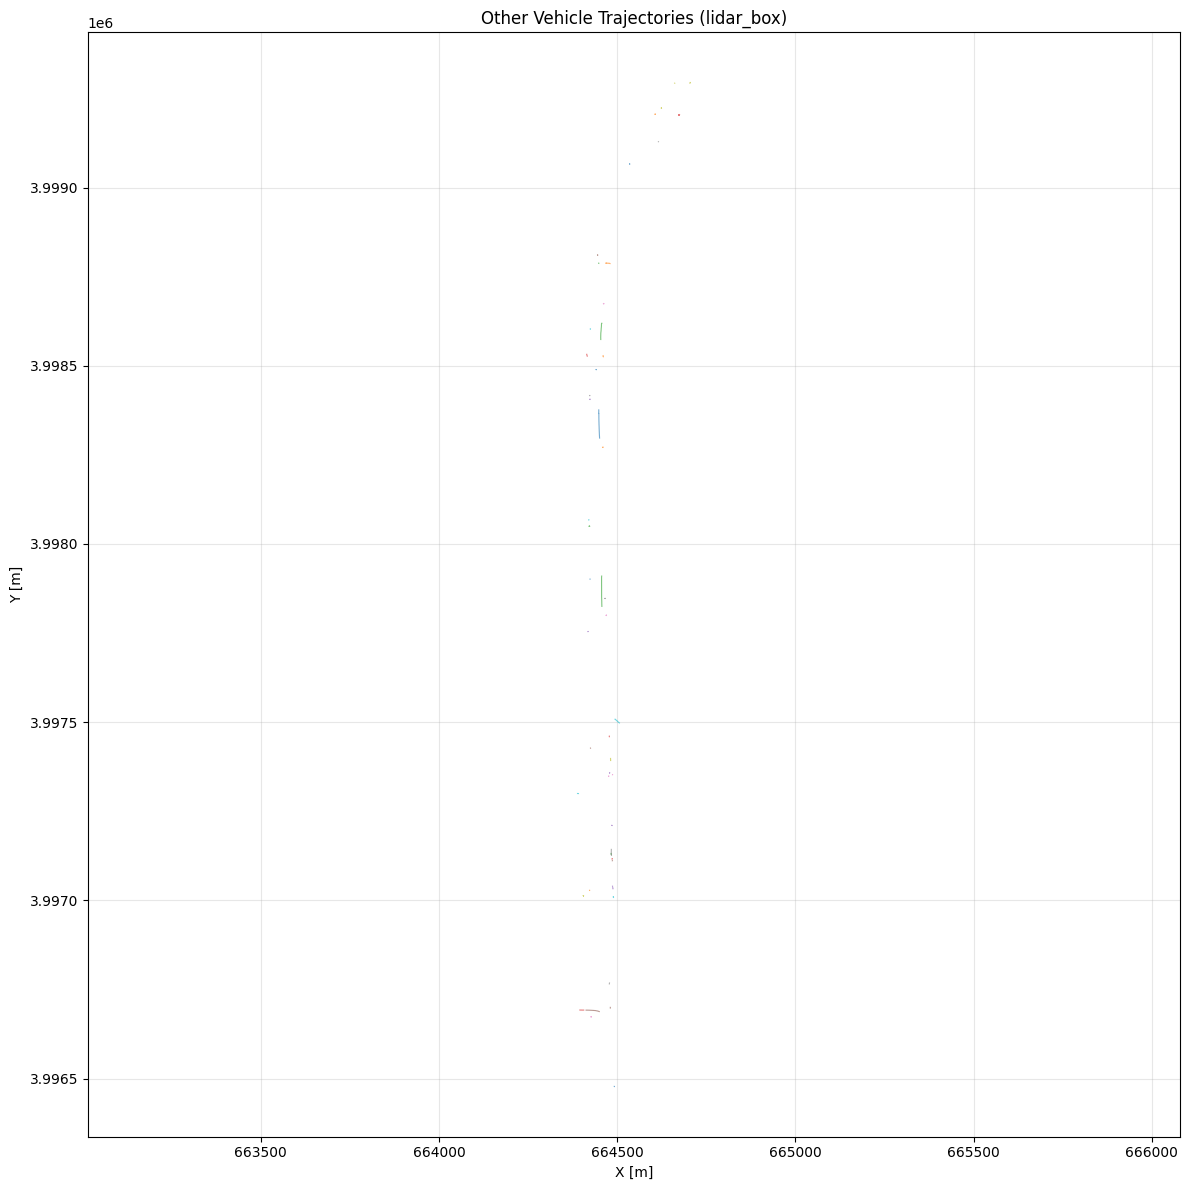

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = "/nuplan/dataset/nuplan-v1.1/splits/mini/2021.05.12.22.00.38_veh-35_01008_01518.db"

with sqlite3.connect(db_path) as con:
    # lidar_box から位置情報を取得（track_token でグループ化）
    lidar_box_df = pd.read_sql_query(
        "SELECT track_token, x, y FROM lidar_box ORDER BY track_token;", 
        con
    )

print(f"lidar_box レコード数: {len(lidar_box_df)}")
print(lidar_box_df.head(10))

# track_token ごとに軌跡をプロット
if 'x' in lidar_box_df.columns and 'y' in lidar_box_df.columns:
    fig, ax = plt.subplots(figsize=(12, 12))
    
    unique_tokens = lidar_box_df['track_token'].unique()
    print(f"ユニークな track_token: {len(unique_tokens)}")
    
    for token in unique_tokens[:50]:  # 最初の50台のみ
        subset = lidar_box_df[lidar_box_df['track_token'] == token]
        if len(subset) > 1:  # 2点以上ある場合のみ描画
            ax.plot(subset['x'], subset['y'], linewidth=0.8, alpha=0.6)
    
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_title('Other Vehicle Trajectories (lidar_box)')
    ax.axis('equal')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### cache.cache_path = /nuplan/exp/sanity_check
- キャッシュ出力先

### cache.cleanup_cache = true
- 実行前に掃除

### scenario_filter = training_scenarios_tiny
- **limit_total_scenarios: 50** に制限したシナリオフィルタ

- ファイルパス
    - /workspace/pluto/config/scenario_filter/training_scenarios_tiny.yaml

- scenario_filter/*.yaml　の違い
    - training_scenarios_tiny.yaml
        - limit_total_scenarios: 50
    - training_scenarios_1M.yaml
        - limit_total_scenarios: 1000000
    

- ファイルの中身
```yaml
_target_: nuplan.planning.scenario_builder.scenario_filter.ScenarioFilter
_convert_: 'all'

scenario_types: null # 含めるシナリオタイプのリスト
scenario_tokens: null # 含めるシナリオトークンのリスト

log_names: null # ログ名でシナリオをフィルタリング
map_names: null  # マップ名でシナリオをフィルタリング

num_scenarios_per_type: null # タイプごとのシナリオ数

# 総シナリオ数の上限（float = 割合、int = 個数）- num_scenarios_per_type の上に適用可能
limit_total_scenarios: 50 

timestamp_threshold_s: null  # 初期 lidar タイムスタンプ間の最小間隔（秒）でシナリオをフィルタ
ego_displacement_minimum_m: null # ego が特定距離以上移動したシナリオのみに制限
ego_start_speed_threshold: null # ego が下から特定速度に到達するシナリオに制限
ego_stop_speed_threshold: null # ego が上から特定速度に低下するシナリオに制限
speed_noise_tolerance: null # この値以下の速度変化はノイズとして無視

expand_scenarios: true # マルチサンプルシナリオを複数の単一サンプルシナリオに展開
remove_invalid_goals: true # ミッションゴールが無効なシナリオを削除
shuffle: true # シナリオをシャッフル
```

In [51]:
import multiprocessing

cpu_count = multiprocessing.cpu_count()
max_workers = int(cpu_count * 3 / 4)  # または (cpu_count * 3) // 4

print(f"CPUコア数: {cpu_count}")
print(f"割り当てワーカー数（3/4）: {max_workers}")

CPUコア数: 20
割り当てワーカー数（3/4）: 15


### Cache作成の実行 : mini = 50

In [47]:
import os, sys  # OS操作とパス操作
from hydra import compose, initialize  # Hydraでcfgを構成
from hydra.core.global_hydra import GlobalHydra  # Hydraインスタンス管理


# 必要ならデータパス等の環境変数をここで設定
# os.environ["NUPLAN_DATA_ROOT"] = "/path/to/nuplan"

os.chdir("/workspace/pluto")  # 作業ディレクトリをplutoに固定
if "/workspace/pluto" not in sys.path:
    sys.path.append("/workspace/pluto")  # モジュール解決用にパス追加
import run_training  # pluto直下のエントリポイント

GlobalHydra.instance().clear()  # Notebookでの再実行前にHydraをリセット

In [48]:
with initialize(config_path="../config", job_name="notebook_cache"):  # configディレクトリを基準にHydra初期化
    cfg = compose(
        config_name="default_training",  # ベース設定
        overrides=[
            "py_func=cache",  # キャッシュ実行を指定
            "+training=train_pluto",  # トレーニング設定を読み込む
            "scenario_builder=nuplan_mini",  # ミニ分割を使用
            "cache.cache_path=/nuplan/exp/sanity_check",  # キャッシュ出力先
            "cache.cleanup_cache=true",  # 実行前に掃除
            "scenario_filter=training_scenarios_tiny",  # 小さなシナリオセット
            # "worker=sequential",  # ワーカーは逐次
            f"worker.max_workers={max_workers}",  # ← 3/4 を動的に指定 
            # 必要なら: "hydra.run.dir=.", "hydra.output_subdir=null" で出力先固定
        ],
    )

run_training.main(cfg)  # 実行

/tmp/ipykernel_115114/4055875751.py:1: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../config", job_name="notebook_cache"):  # configディレクトリを基準にHydra初期化
/opt/conda/envs/pluto/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'default_training': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
Global seed set to 0


2026-01-28 00:29:10,844 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:20}  Building experiment folders...
2026-01-28 00:29:10,844 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:20}  Building experiment folders...
2026-01-28 00:29:10,845 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:22}  Experimental folder: /root/nuplan/exp/exp/training/pluto/2026.01.28.00.29.10
2026-01-28 00:29:10,845 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:22}  Experimental folder: /root/nuplan/exp/exp/training/pluto/2026.01.28.00.29.10
2026-01-28 00:29:10,845 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:19}  Building WorkerPool...
2026-01-28 00:29:10,845 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:19}  Building WorkerPool...
2026-01-28 00:29:10,845 INFO {/workspace/nuplan-devkit/nuplan/planni

### Cache作成の実行 : boston
- 変化点
    - scenario_builder = nuplan_boston
        - ダウンロードした *.db があるフォルダを指定している
    - cache.cache_path = /nuplan/exp/cache_pluto_boston
        - boston専用のフォルダに出力する
    - scenario_filter = training_scenarios_1M
        - 出力数が 1M のものを流用する    

In [53]:
with initialize(config_path="../config", job_name="notebook_cache"):  # configディレクトリを基準にHydra初期化
    cfg = compose(
        config_name="default_training",  # ベース設定
        overrides=[
            "py_func=cache",  # キャッシュ実行を指定
            "+training=train_pluto",  # トレーニング設定を読み込む
            "scenario_builder=nuplan_boston",  # ミニ分割を使用
            "cache.cache_path=/nuplan/exp/cache_pluto_boston_1K",  # キャッシュ出力先
            "cache.cleanup_cache=false",  # 実行前に掃除
            "scenario_filter=training_scenarios_1K",  # 小さなシナリオセット
            # "worker=sequential",  # ワーカーは逐次
            "worker=single_machine_thread_pool", # ← マルチスレッド並列処理に変更
            f"worker.max_workers={max_workers}", # ← CPU の 3/4 を割り当て（+ なし）
            # 必要なら: "hydra.run.dir=.", "hydra.output_subdir=null" で出力先固定
        ],
    )

run_training.main(cfg)  # 実行

/tmp/ipykernel_115114/185072199.py:1: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../config", job_name="notebook_cache"):  # configディレクトリを基準にHydra初期化
Global seed set to 0


2026-01-28 11:11:19,096 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:20}  Building experiment folders...
2026-01-28 11:11:19,096 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:20}  Building experiment folders...
2026-01-28 11:11:19,096 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:22}  Experimental folder: /root/nuplan/exp/exp/training/pluto/2026.01.28.11.11.19
2026-01-28 11:11:19,096 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:22}  Experimental folder: /root/nuplan/exp/exp/training/pluto/2026.01.28.11.11.19
2026-01-28 11:11:19,096 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:19}  Building WorkerPool...
2026-01-28 11:11:19,096 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:19}  Building WorkerPool...


InstantiationException: Error in call to target 'nuplan.planning.utils.multithreading.worker_ray.RayDistributed':
TypeError("__init__() got an unexpected keyword argument 'max_workers'")
full_key: worker

## 2. 学習の実行

### Mini のキャッシュを利用した学習コード from README
```bash
CUDA_VISIBLE_DEVICES=0 python run_training.py \
  py_func=train +training=train_pluto \
  worker=single_machine_thread_pool worker.max_workers=4 \
  scenario_builder=nuplan cache.cache_path=/nuplan/exp/sanity_check cache.use_cache_without_dataset=true \
  data_loader.params.batch_size=4 data_loader.params.num_workers=1
```

### 1M のキャッシュを利用した学習コード from README
```bash
CUDA_VISIBLE_DEVICES=0,1,2,3 python run_training.py \
  py_func=train +training=train_pluto \
  worker=single_machine_thread_pool worker.max_workers=32 \
  scenario_builder=nuplan cache.cache_path=/nuplan/exp/cache_pluto_1M cache.use_cache_without_dataset=true \
  data_loader.params.batch_size=32 data_loader.params.num_workers=16 \
  lr=1e-3 epochs=25 warmup_epochs=3 weight_decay=0.0001 \
  wandb.mode=online wandb.project=nuplan wandb.name=pluto
```

### Miniの学習の実行

In [61]:
import subprocess
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
python_path = "/opt/conda/envs/pluto/bin/python"
result = subprocess.run([
    python_path, "/workspace/pluto/run_training.py",
    "py_func=train",
    "+training=train_pluto",
    "worker=single_machine_thread_pool",
    f"worker.max_workers={max_workers}",
    "scenario_builder=nuplan",
    "cache.cache_path=/nuplan/exp/sanity_check",
    "cache.use_cache_without_dataset=true",
    "data_loader.params.batch_size=4",
    "data_loader.params.num_workers=1",
], cwd="/workspace/pluto")

print(f"Exit code: {result.returncode}")

/opt/conda/envs/pluto/lib/python3.9/site-packages/lightning_fabric/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)
/workspace/pluto/run_training.py:41: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path=CONFIG_PATH, config_name=CONFIG_NAME)
/opt/conda/envs/pluto/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'default_training': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
/opt/conda/envs/pluto/lib/python3.9/site-packages/hydra/_internal/hydra.py:

2026-01-28 22:19:07,846 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:20}  Building experiment folders...
2026-01-28 22:19:07,847 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:22}  Experimental folder: /root/nuplan/exp/exp/training/pluto/2026.01.28.22.19.06
2026-01-28 22:19:07,847 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:19}  Building WorkerPool...
2026-01-28 22:19:07,849 INFO {/workspace/nuplan-devkit/nuplan/planning/utils/multithreading/worker_pool.py:101}  Worker: SingleMachineParallelExecutor
2026-01-28 22:19:07,849 INFO {/workspace/nuplan-devkit/nuplan/planning/utils/multithreading/worker_pool.py:102}  Number of nodes: 1
Number of CPUs per node: 15
Number of GPUs per node: 0
Number of threads across all nodes: 15
2026-01-28 22:19:07,849 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:27}  Building WorkerPool...DONE!
2026-01-28 22:

/opt/conda/envs/pluto/lib/python3.9/site-packages/timm/models/layers/__init__.py:49: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


2026-01-28 22:19:08,717 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/splitter_builder.py:21}  Building Splitter...DONE!
2026-01-28 22:19:08,717 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/data_augmentation_builder.py:19}  Building augmentors...
2026-01-28 22:19:08,724 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/data_augmentation_builder.py:28}  Building augmentors...DONE!
2026-01-28 22:19:08,729 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/scenario_builder.py:171}  Extracted 50 scenarios for training
2026-01-28 22:19:08,734 INFO {/workspace/pluto/run_training.py:69}  Starting training...


[rank: 0] Global seed set to 0
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/1
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 1 processes
----------------------------------------------------------------------------------------------------

You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


2026-01-28 22:19:09,186 INFO {/workspace/pluto/src/custom_training/custom_datamodule.py:56}  Number of samples in train set: 38
2026-01-28 22:19:09,186 INFO {/workspace/pluto/src/custom_training/custom_datamodule.py:56}  Number of samples in validation set: 5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/pluto/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/conda/envs/pluto/lib/python3.9/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once
/opt/conda/envs/pluto/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  ran

┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name           ┃ Type              ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model          │ PlanningModel     │  4.1 M │
│ 1 │ collision_loss │ ESDFCollisionLoss │      0 │
└───┴────────────────┴───────────────────┴────────┘
Trainable params: 4.1 M                                                         
Non-trainable params: 0                                                         
Total params: 4.1 M                                                             
Total estimated model params size (MB): 16                                      
Epoch 0/24 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/9 0:00:00 • -:--:-- 0.00it/s 

/opt/conda/envs/pluto/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/opt/conda/envs/pluto/lib/python3.9/site-packages/torch/nn/functional.py:5096: 
align_corners=False since 1.3.0. Please specify align_corners=True if the old 
behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/opt/conda/envs/pluto/lib/python3.9/site-packages/pytorch_lightning/utilities/da0:00:00 • -:--:-- 0.00it/s 
ta.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous 
collection. The batch size we found is 12. To avoid any miscalculations, use 
`self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
Epoch 0/24 ━━╺━━━━━━━━━━━━━━━ 1/9 0:00:02 • -:--:-- 0.00it/s v_num:             
                                                             loss/train_loss_st…
Epoch 0/24 ━━━━╺━━━━━━━━━━━━━ 2/9 0:00:02 • 0:00:02 5.67it/s v_num:             
                                                             loss/train_loss_st…
Epoch 0/24 ━━━━╺━━━━━━━━━━━━━ 2/9 0:00:02 • 0:00:02 5.67it/s v_num:             
                         

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 24/24 ━━━━━━━━━━━━━━━━━━ 9/9 0:00:01 • 0:00:00 6.24it/s v_num:            
                                                              loss/train_loss_s…
                                                              26.15 val/minADE: 
                                                              15.365 val/minFDE:
                                                              31.627 val/MR: 1.0
                                                              val/PredAvgADE:   
                                                              5.583             
                                                              val/PredAvgFDE:   
                                                              12.378            
                                                              loss/train_loss_e…
                                                              30.11             


[rank0]:[W128 22:20:06.214004085 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


Exit code: 0


### Bostonの学習の実行

In [63]:
import subprocess
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
python_path = "/opt/conda/envs/pluto/bin/python"
result = subprocess.run([
    python_path, "/workspace/pluto/run_training.py",
    "py_func=train",
    "+training=train_pluto",
    "splitter=ratio_splitter",  # /workspace/pluto/config/splitter/ratio_splitter.yaml
    "worker=single_machine_thread_pool",
    f"worker.max_workers={max_workers}",
    "scenario_builder=nuplan_boston",
    "cache.cache_path=/nuplan/exp/cache_pluto_boston_1K",
    "cache.use_cache_without_dataset=true",
    "data_loader.params.batch_size=8",
    "data_loader.params.num_workers=16",
    "lr=1e-3",
    "epochs=25",
    "warmup_epochs=3",
    "weight_decay=0.0001",
    "wandb.mode=online",
    "wandb.project=nuplan",
    "wandb.name=pluto",
], cwd="/workspace/pluto")

print(f"Exit code: {result.returncode}")

/opt/conda/envs/pluto/lib/python3.9/site-packages/lightning_fabric/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)
/workspace/pluto/run_training.py:41: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path=CONFIG_PATH, config_name=CONFIG_NAME)
/opt/conda/envs/pluto/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'default_training': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
/opt/conda/envs/pluto/lib/python3.9/site-packages/hydra/_internal/hydra.py:

2026-01-28 22:36:34,286 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:20}  Building experiment folders...
2026-01-28 22:36:34,286 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/folder_builder.py:22}  Experimental folder: /root/nuplan/exp/exp/training/pluto/2026.01.28.22.36.34
2026-01-28 22:36:34,286 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:19}  Building WorkerPool...
2026-01-28 22:36:34,287 INFO {/workspace/nuplan-devkit/nuplan/planning/utils/multithreading/worker_pool.py:101}  Worker: SingleMachineParallelExecutor
2026-01-28 22:36:34,287 INFO {/workspace/nuplan-devkit/nuplan/planning/utils/multithreading/worker_pool.py:102}  Number of nodes: 1
Number of CPUs per node: 15
Number of GPUs per node: 0
Number of threads across all nodes: 15
2026-01-28 22:36:34,287 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/worker_pool_builder.py:27}  Building WorkerPool...DONE!
2026-01-28 22:

/opt/conda/envs/pluto/lib/python3.9/site-packages/wandb/apis/public.py:3109: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
wandb: WARNING Path /workspace/exp/wandb/ wasn't writable, using system temp directory
wandb: WARNING Path /workspace/exp/wandb/ wasn't writable, using system temp directory
wandb: Currently logged in as: est2mzd (est2mzd-takuyakobayashi). Use `wandb login --relogin` to force relogin


2026-01-28 22:36:39,438 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/model_builder.py:18}  Building TorchModuleWrapper...


wandb: wandb version 0.24.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.14.2
wandb: Run data is saved locally in /root/nuplan/exp/exp/wandb/run-20260128_223635-nd88goyf
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run pluto
wandb: ⭐️ View project at https://wandb.ai/est2mzd-takuyakobayashi/nuplan
wandb: 🚀 View run at https://wandb.ai/est2mzd-takuyakobayashi/nuplan/runs/nd88goyf
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
/opt/conda/envs/pluto/lib/python3.9/site-packages/timm/models/layers/__init__.py:4

2026-01-28 22:36:39,744 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/model_builder.py:21}  Building TorchModuleWrapper...DONE!
2026-01-28 22:36:39,745 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/splitter_builder.py:18}  Building Splitter...
2026-01-28 22:36:39,749 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/splitter_builder.py:21}  Building Splitter...DONE!
2026-01-28 22:36:39,749 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/data_augmentation_builder.py:19}  Building augmentors...
2026-01-28 22:36:39,751 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/data_augmentation_builder.py:28}  Building augmentors...DONE!
2026-01-28 22:36:39,805 INFO {/workspace/nuplan-devkit/nuplan/planning/script/builders/scenario_builder.py:171}  Extracted 988 scenarios for training
2026-01-28 22:36:39,809 INFO {/workspace/pluto/run_training.py:69}  Starting training...
2026-01-28 22:36:40,120 INFO {/workspace/pluto/src/c

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/pluto/lib/python3.9/site-packages/torch/distributed/distributed_c10d.py:4807: UserWarning: No device id is provided via `init_process_group` or `barrier `. Using the current device set by the user. 
  warnings.warn(  # warn only once


/opt/conda/envs/pluto/lib/python3.9/site-packages/torch/nn/functional.py:5096: 0:00:00 • -:--:-- 0.00it/s 
align_corners=False since 1.3.0. Please specify align_corners=True if the old 
behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/opt/conda/envs/pluto/lib/python3.9/site-packages/pytorch_lightning/utilities/da0:00:00 • -:--:-- 0.00it/s 
ta.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous 
collection. The batch size we found is 24. To avoid any miscalculations, use 
`self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
Epoch 0/24 ━━━━━━━━━━━━━━━━━━ 1/86 0:00:01 • -:--:-- 0.00it/s v_num: goyf       
                                                              loss/train_loss_s…
Epoch 0/24 ━━━━━━━━━━━━━━━━━━ 2/86 0:00:02 • 0:00:16 5.45it/s v_num: goyf       
                                                              loss/train_loss_s…
Epoch 0/24 ━━━━━━━━━━━━━━━━━━ 2/86 0:00:02 • 0:00:16 5.45it/s v_num: goyf      

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 24/24 ━━━━━━━━━━━━━━━━━ 86/86 0:00:36 • 0:00:00 2.17it/s v_num: goyf      
                                                               loss/train_loss_…
                                                               10.087           
                                                               val/minADE: 2.002
                                                               val/minFDE: 4.106
                                                               val/MR: 0.469    
                                                               val/PredAvgADE:  
                                                               1.012            
                                                               val/PredAvgFDE:  
                                                               2.945            
                                                               loss/train_loss_…
                                                               6.17             


wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:                              epoch ▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
wandb:              loss/train_loss_epoch █▇▆▄▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
wandb:               loss/train_loss_step ▆▇█▇▆▄▄▅▄▃▄▂▂▂▁▁▁▁▁▁▂▁▂▂▂▂▁▃▁▁▂▁▂▂▂▁▁▁▁▂
wandb:                loss/val_loss_epoch █▇▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                 loss/val_loss_step ▇▅▆█▃▄▅▂▃▄▃▃▂▃▃▁▂▃▁▂▁▂▂▁▂▂▁▂▂▁▂▁▂▂▁▂▂▁▂▂
wandb:                       lr-AdamW/pg1 ▃▆█████▇▇▇▆▆▅▅▄▄▃▃▃▂▂▂▁▁▁
wandb:                       lr-AdamW/pg2 ▃▆█████▇▇▇▆▆▅▅▄▄▃▃▃▂▂▂▁▁▁
wandb:          objectives/train_cls_loss █▅▄▄▄▃▃▃▃▃▃▂▃▂▂▂▂▂▁▁▁▁▁▁▁
wandb:    objectives/train_collision_loss ▁▁▃▆█▇▇▇█▆▅▆▆▅▅▄▄▄▃▄▄▃▃▂▃
wandb:  objectives/train_contrastive_loss ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              objectives/train_loss █▇▆▄▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   objectives/train_prediction_loss █▆▅▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: objectives/train_ref_free_reg_loss ▁▁▁▁▁▁▁▁▁▁▁▁▁▁

Exit code: 0


## 3. LogSplitter vs RatioSplitter の解説

### なぜ Mini は `nuplan` で成功し、Boston は `ratio_splitter` で成功するのか

#### 2つの Splitter の根本的な違い

| 項目 | **LogSplitter** (`nuplan`) | **RatioSplitter** (`ratio_splitter`) |
|------|--------------------------|------------------------|
| **分割方式** | 🔍 **ログ名マッチング** | 📊 **比率ベース分割** |
| **動作** | nuplan.yaml の事前定義ログと照合 | シナリオを 70/20/10 で自動分割 |
| **依存性** | ログが nuplan.yaml に登録されていることが必須 | ログの内容に依存しない |
| **柔軟性** | ❌ 低い（定義済みログのみ） | ✅ 高い（任意のログに対応） |

---

#### Mini が `nuplan` で成功する理由 ✅

```
nuplan.yaml の train セクション（行 1～13,186）
├─ 2021.05.12.22.00.38_veh-35_01008_01518  ← Mini ログ（ここに存在！）
├─ 2021.05.12.19.36.12_veh-35_00005_00204
├─ ...
└─ 2021.05.27... (最後のログ)

LogSplitter の処理:
1. Mini ログ名を抽出
2. nuplan.yaml の train セクションで検索
3. 「見つかった！」→ train グループに割り当て
4. val/test グループも見つかる → 検証サンプル確保 ✅
```

**結論:** Mini ログが **事前登録済み** だから LogSplitter で動作する

---

#### Boston が `nuplan` で失敗する理由 ❌

```
nuplan.yaml の train/val/test セクション
├─ すべて 2021.05.* ～ 2021.06.07* のログのみ
└─ Boston (train_boston) ログは登録されていない ❌

LogSplitter の処理:
1. Boston ログ名を抽出
2. nuplan.yaml で検索
3. 「見つからない...」→ マッチなし
4. 検証グループに割り当てるログなし → 検証サンプル 0 件 ❌
5. AssertionError 発生
```

**結論:** Boston ログが **事前登録されていない** から LogSplitter で失敗する

---

#### Boston が `ratio_splitter` で成功する理由 ✅

```
RatioSplitter の処理（ログ名に関係なく実行）:
1. Boston から抽出した 988 シナリオを見る
2. ログ名をチェック → 不要（比率分割だから）
3. 比率で自動分割: 70% train + 20% val + 10% test
4. 検証サンプルが自動生成される ✅
```

**結論:** RatioSplitter は **ログ名に依存しない** から boston でも動作する

---

#### ビジュアル比較

```
┌────────────────────────────────────────────────────────┐
│               Mini (2021.05.12 ログ)                    │
├────────────────────────────────────────────────────────┤
│ LogSplitter: nuplan.yaml で検索 → 「あります！」✅     │
│ RatioSplitter: 70/20/10 分割 → 「OK」✅                │
│                                                        │
│ 【おすすめ】 nuplan（事前定義済みだから最適）          │
└────────────────────────────────────────────────────────┘

┌────────────────────────────────────────────────────────┐
│           Boston (train_boston ログ)                    │
├────────────────────────────────────────────────────────┤
│ LogSplitter: nuplan.yaml で検索 → 「ありません」❌     │
│ RatioSplitter: 70/20/10 分割 → 「OK」✅                │
│                                                        │
│ 【おすすめ】 ratio_splitter（カスタムログに対応）      │
└────────────────────────────────────────────────────────┘
```

---

#### まとめ

| データセット | 推奨 Splitter | 理由 |
|-----------|------------|------|
| **Mini** | `nuplan` | ログが nuplan.yaml に事前登録されている |
| **Boston** | `ratio_splitter` | ログが nuplan.yaml に登録されていないから、動的分割が必要 |
| **その他カスタム** | `ratio_splitter` | 新しいログセットには常に比率ベース分割が無難 |

**設計の意図:**
- `LogSplitter`: 標準データセット用（再現性重視）
- `RatioSplitter`: 新規データセット用（汎用性重視）

**ファイルパス:**
- LogSplitter 設定: `/workspace/nuplan-devkit/nuplan/planning/script/config/common/splitter/nuplan.yaml`
- RatioSplitter 設定: `/workspace/pluto/config/splitter/ratio_splitter.yaml`